/var/folders/wt/ty21shy558n52g1rr7brrp9w0000gn/T/ipykernel_4220/4013227283.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
/var/folders/wt/ty21shy558n52g1rr7brrp9w0000gn/T/ipykernel_4220/4013227283.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

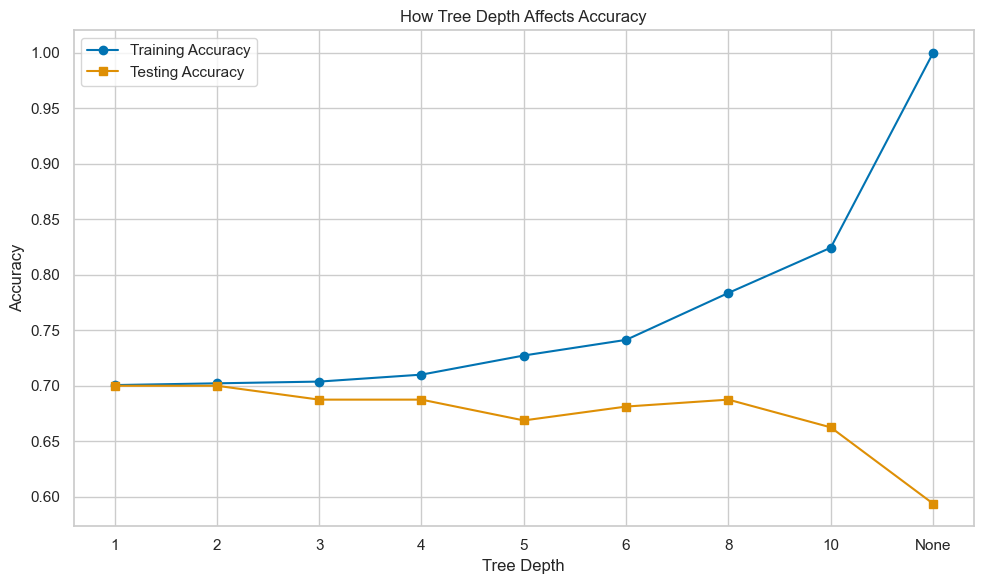

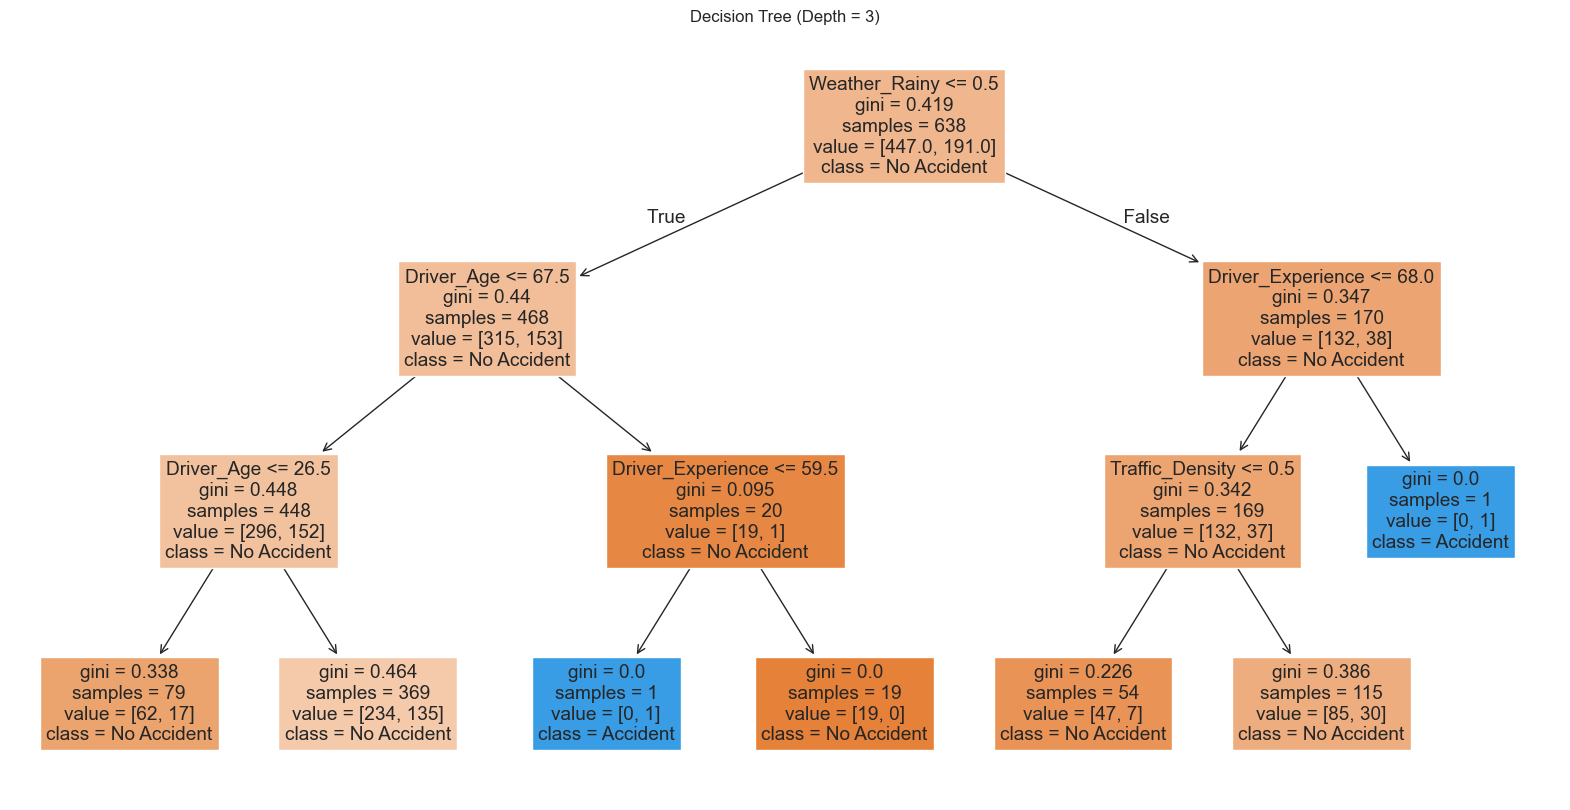

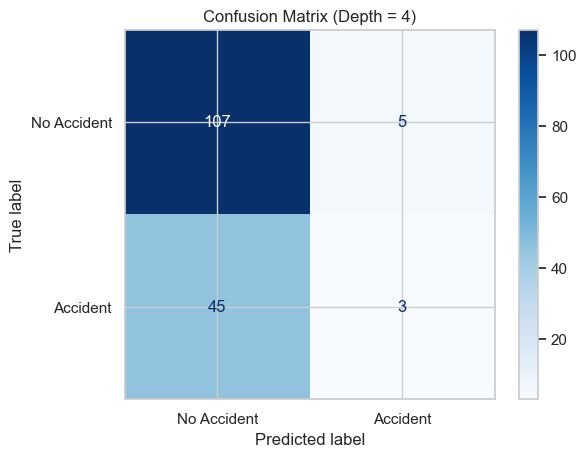

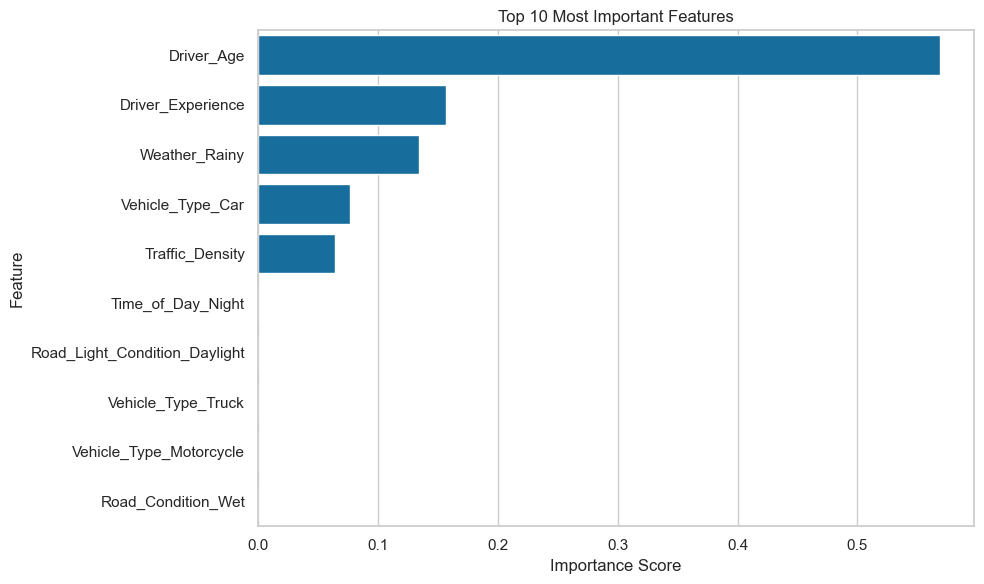

In [1]:
# Traffic Accident Prediction with Decision Trees
# How Tree Depth Affects Accuracy and Interpretability

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

sns.set(style="whitegrid", palette="colorblind")  # Accessibility-friendly plots

# Step 2: Load and clean the dataset
data = pd.read_csv("dataset_traffic_accident_prediction1.csv")
data = data.dropna(subset=['Accident'])

# Fill missing values
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Cap vehicle count
data['Number_of_Vehicles'] = data['Number_of_Vehicles'].clip(upper=5)

# Step 3: Encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Step 4: Define features and target
X = data.drop(['Accident', 'Accident_Severity'], axis=1, errors='ignore')
y = data['Accident']

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train trees with varying depths
depths = [1, 2, 3, 4, 5, 6, 8, 10, None]
train_accuracy = []
test_accuracy = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, tree.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, tree.predict(X_test)))

# Step 7: Plot accuracy vs depth
plt.figure(figsize=(10, 6))
depth_labels = [str(d) if d is not None else "None" for d in depths]

plt.plot(depth_labels, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(depth_labels, test_accuracy, marker='s', label='Testing Accuracy')

plt.title("How Tree Depth Affects Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Visualize a tree (depth = 3)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["No Accident", "Accident"], filled=True)
plt.title("Decision Tree (Depth = 3)")
plt.show()

# Step 9: Confusion matrix for depth 4
final_model = DecisionTreeClassifier(max_depth=4, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Accident", "Accident"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Depth = 4)")
plt.show()

# Step 10: Feature importance
importances = pd.Series(final_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


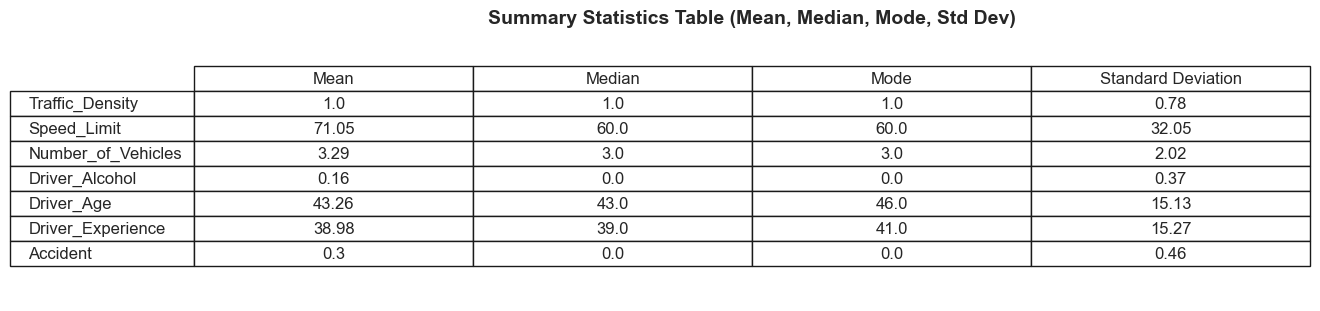

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("dataset_traffic_accident_prediction1.csv")  # Replace with your file path

# Select only numerical columns
numeric_df = df.select_dtypes(include='number')

# Calculate summary statistics
mean_vals = numeric_df.mean().round(2)
median_vals = numeric_df.median().round(2)
mode_vals = numeric_df.mode().iloc[0].round(2)
std_vals = numeric_df.std().round(2)

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    "Mean": mean_vals,
    "Median": median_vals,
    "Mode": mode_vals,
    "Standard Deviation": std_vals
})

# Display as a matplotlib table and save as image
fig, ax = plt.subplots(figsize=(12, len(summary_stats) * 0.5))
ax.axis('off')  # Turn off axes

# Create the table
table = ax.table(
    cellText=summary_stats.values,
    rowLabels=summary_stats.index,
    colLabels=summary_stats.columns,
    cellLoc='center',
    loc='center'
)

# Scale for better fit
table.scale(1.2, 1.5)
plt.title("Summary Statistics Table (Mean, Median, Mode, Std Dev)", fontsize=14, weight='bold')

# Save to file
plt.savefig("summary_statistics_table.png", bbox_inches='tight')
plt.show()
